In [3]:
#using generators to create some of more images
import os
import  keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import  image
import matplotlib.pyplot  as plt
import cv2

Using TensorFlow backend.


###### Creating 5 samples of each image

In [2]:
img = image.load_img('p/pos1.jpg',target_size=(61,155))

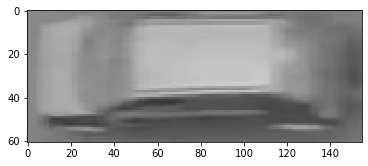

In [3]:
plt.imshow(img)

In [1]:
def Image_DataGenerator():
    '''
    This fuction is used to create some extra sample images through data augmentation
    of both classes, negative and positive
    '''
    datagen = ImageDataGenerator(rotation_range=10,
                                zoom_range=0.4,
                                horizontal_flip=True,
                                )
    images = ['neg2.JPG','neg3.JPG','neg4.JPG','neg5.JPG','neg6.JPG','neg7.JPG']
    count = 30
    print("Creating {T} Total Samples of {S} images".format(T = len(images)*4,S = len(images)))
    for i in images:
        img = image.load_img('n/{}'.format(i),target_size=(61,155))
        #loading the image with the target size of 61 x 155
        samples = 0 #creating 4 samples of each image
        x = image.img_to_array(img)
        x = x.reshape((1,)+x.shape)
        #reshape the 3d image i-e (61 x 155 x 3) into 4d which will be (1 x 61 x 155 x 3)
        for batch in datagen.flow(x,batch_size=1):
            count += 1
            #imgplot = plt.imshow(image.array_to_img(batch[0]))
            image.save_img('n/neg{}.jpg'.format(count),image.array_to_img(batch[0]))
            samples += 1
            if samples == 4:
                #creating 4 augmented samples of each image
                break

In [5]:
def GreyScaleConvert():
    dirs = 'p/'
    img_to_convert = os.listdir(dirs) 
    for img in img_to_convert:
        x = cv2.imread(dirs+img,0)
        x = cv2.cvtColor(x,cv2.COLOR_GRAY2BGR)
        cv2.imwrite(dirs+img,x)
    #converting all neg images into grey scale

In [6]:
GreyScaleConvert()

In [4]:
Image_DataGenerator()

Creating 24 Total Samples of 6 images
